In [1]:
#Import Library
import pandas as pd
import numpy as np
import skfuzzy as fuzz
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
#Membaca dan Menampilkan Dataset
#Menjadikan Kolom 'Lokasi' Sebagai Index
df = pd.read_excel('AllCity&Regency 2.0.xlsx', index_col = 'Lokasi')
df

,2010 (Luas Panen),2010 (Produksi),2010 (Produktivitas),2011 (Luas Panen),2011 (Produksi),2011 (Produktivitas),2012 (Luas Panen),2012 (Produksi),2012 (Produktivitas),2013 (Luas Panen),...,2020 (Produktivitas),2021 (Luas Panen),2021 (Produksi),2021 (Produktivitas),2022 (Luas Panen),2022 (Produksi),2022 (Produktivitas),2023 (Luas Panen),2023 (Produksi),2023 (Produktivitas)
Lokasi,,,,,,,,,,,,,,,,,,,,,
Simeulue,5236.0,20976.0,40.06,5288.0,19134.0,36.18,7353.0,26005.0,35.37,5913.0,...,31.38,5586.80,16728.21,29.94,4568.38,11648.15,25.50,5780.84,22042.94,39.59
Aceh Singkil,1363.0,5160.0,37.86,1580.0,4493.0,28.44,1710.0,6611.0,38.66,1308.0,...,50.97,647.32,3350.51,51.76,398.80,2203.58,55.26,568.49,2589.40,51.38
Aceh Selatan,11855.0,51464.0,43.41,12738.0,46369.0,36.40,15248.0,64309.0,42.18,17066.0,...,54.00,8930.58,44839.80,50.21,6780.36,30288.69,44.67,9437.58,46345.03,52.13
Aceh Tenggara,21469.0,94594.0,44.06,17102.0,69554.0,40.67,13902.0,62462.0,44.93,22720.0,...,63.72,10644.51,65559.88,61.59,10572.44,69478.52,65.72,10809.75,63764.22,64.34
Aceh Timur,33013.0,146217.0,44.29,41795.0,193714.0,46.35,46488.0,213033.0,45.83,43825.0,...,49.19,27425.19,138347.01,50.45,24556.61,130151.43,53.00,20932.84,108241.39,52.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Bantul,30726.0,190356.0,61.95,30699.0,198004.0,64.50,30205.0,205355.0,67.99,32692.0,...,56.60,24670.88,141942.75,57.53,24010.84,130339.44,54.28,22924.01,123289.21,53.78
Gunung Kidul,53803.0,259282.0,48.19,57375.0,277813.0,48.42,56416.0,291695.0,51.70,58924.0,...,41.89,41993.90,197399.07,47.01,43703.94,198309.83,45.38,41616.38,191255.42,45.95
Sleman,44838.0,266073.0,59.34,41080.0,232713.0,56.65,46299.0,312815.0,67.56,49083.0,...,46.84,24525.71,123590.16,50.39,23796.17,116951.41,49.15,22943.66,115592.50,50.38


In [3]:
#Memeriksa Missing Values
null_values = df.isnull()
print(null_values)
df.describe()

                 2010 (Luas Panen)  2010 (Produksi)  2010 (Produktivitas)   
Lokasi                                                                      
Simeulue                     False            False                 False  \
Aceh Singkil                 False            False                 False   
Aceh Selatan                 False            False                 False   
Aceh Tenggara                False            False                 False   
Aceh Timur                   False            False                 False   
...                            ...              ...                   ...   
Bantul                       False            False                 False   
Gunung Kidul                 False            False                 False   
Sleman                       False            False                 False   
Kota Yogyakarta              False            False                 False   
Kulon Progo                  False            False                 False   

,2010 (Luas Panen),2010 (Produksi),2010 (Produktivitas),2011 (Luas Panen),2011 (Produksi),2011 (Produktivitas),2012 (Luas Panen),2012 (Produksi),2012 (Produktivitas),2013 (Luas Panen),...,2020 (Produktivitas),2021 (Luas Panen),2021 (Produksi),2021 (Produktivitas),2022 (Luas Panen),2022 (Produksi),2022 (Produktivitas),2023 (Luas Panen),2023 (Produksi),2023 (Produktivitas)
count,516.000000,5.160000e+02,516.000000,516.000000,5.160000e+02,516.000000,516.000000,5.160000e+02,516.000000,516.000000,...,516.00000,516.000000,5.160000e+02,516.000000,516.000000,5.160000e+02,516.000000,516.000000,5.160000e+02,516.000000
mean,31851.368023,1.312192e+05,43.364748,31784.412597,1.298622e+05,43.222597,32478.718798,1.350135e+05,44.926163,33219.278876,...,44.30662,24043.614244,1.073766e+05,46.004372,24091.222403,1.076140e+05,45.445174,23650.904496,1.069378e+05,46.056802
std,50580.257622,1.941110e+05,11.799278,51159.236270,1.889452e+05,12.268100,52082.782569,1.964535e+05,12.506812,52941.270162,...,12.37910,37776.233359,1.779063e+05,11.423411,39005.441125,1.840987e+05,11.678777,37770.005115,1.774520e+05,11.436602
min,2.000000,5.300000e-01,0.000000,2.000000,5.300000e-01,0.170000,1.000000,5.300000e-01,0.170000,2.000000,...,0.04000,0.170000,5.300000e-01,0.050000,0.170000,5.300000e-01,0.050000,0.110000,4.300000e-01,0.100000
25%,2126.750000,8.215000e+03,35.182500,2055.250000,7.635750e+03,34.987500,2019.500000,7.775250e+03,36.622500,2221.500000,...,35.60750,1238.485000,4.442580e+03,38.680000,1187.210000,4.858347e+03,38.257500,994.005000,4.344100e+03,39.035000
50%,13072.500000,4.371100e+04,43.770000,13146.000000,4.666500e+04,43.865000,14365.000000,5.148700e+04,45.155000,14872.500000,...,45.31500,7847.685000,2.933261e+04,47.370000,7742.665000,2.925859e+04,46.695000,7756.030000,3.095659e+04,47.220000
75%,41864.250000,1.778800e+05,52.240000,41869.500000,1.787545e+05,52.375000,43229.000000,1.696085e+05,53.817500,43531.000000,...,53.67250,31553.422500,1.264627e+05,54.197500,31059.567500,1.325716e+05,54.280000,31057.790000,1.337371e+05,54.337500
max,461294.000000,1.358441e+06,69.910000,511044.000000,1.415050e+06,79.300000,481192.000000,1.376604e+06,80.250000,477489.000000,...,75.19000,323107.610000,1.319624e+06,75.540000,331769.450000,1.499996e+06,74.770000,312405.530000,1.424303e+06,71.660000


In [4]:
#Menampilkan Informasi mengenai Data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 516 entries, Simeulue to Kulon Progo
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   2010 (Luas Panen)     516 non-null    float64
 1   2010 (Produksi)       516 non-null    float64
 2   2010 (Produktivitas)  516 non-null    float64
 3   2011 (Luas Panen)     516 non-null    float64
 4   2011 (Produksi)       516 non-null    float64
 5   2011 (Produktivitas)  516 non-null    float64
 6   2012 (Luas Panen)     516 non-null    float64
 7   2012 (Produksi)       516 non-null    float64
 8   2012 (Produktivitas)  516 non-null    float64
 9   2013 (Luas Panen)     516 non-null    float64
 10  2013 (Produksi)       516 non-null    float64
 11  2013 (Produktivitas)  516 non-null    float64
 12  2014 (Luas Panen)     516 non-null    float64
 13  2014 (Produksi)       516 non-null    float64
 14  2014 (Produktivitas)  516 non-null    float64
 15  2015 (Luas Pa

Tidak ada missing values pada dataset

In [5]:
#Standaridasi Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.values)

# Mengubah hasil scaled_data (array) kembali menjadi DataFrame
df_scaled = pd.DataFrame(scaled_data, columns=df.columns, index=df.index)

# Memperbarui DataFrame asli
df.update(df_scaled)

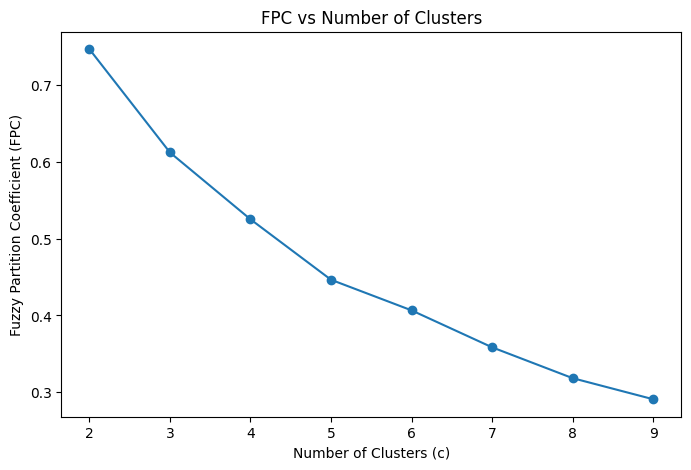

In [6]:
#Menentukan Jumlah Cluster Optimal
cluster_range = range(2, 10)
fpc_values = []

for c in cluster_range:
    # Fuzzy C-Means
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        scaled_data.T, c, 2, error=0.0001, maxiter=5000, init=None
    )
    fpc_values.append(fpc)

# Plot hasil FPC untuk menentukan jumlah cluster optimal
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, fpc_values, marker='o')
plt.xlabel("Number of Clusters (c)")
plt.ylabel("Fuzzy Partition Coefficient (FPC)")
plt.title("FPC vs Number of Clusters")
plt.show()

In [7]:
optimal_k = 2

In [8]:
#Melakukan Fuzzy C-Means
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    scaled_data.T, optimal_k, 1.5, error=0.0001, maxiter=5000, init=None
)

# Menentukan cluster untuk tiap provinsi berdasarkan keanggotaan tertinggi
cluster_membership = np.argmax(u, axis=0)
df['Cluster'] = cluster_membership

In [9]:
#Menampilkan Daftar Cluster
df['Cluster']

Lokasi
Simeulue           1
Aceh Singkil       1
Aceh Selatan       1
Aceh Tenggara      1
Aceh Timur         1
                  ..
Bantul             1
Gunung Kidul       1
Sleman             1
Kota Yogyakarta    1
Kulon Progo        1
Name: Cluster, Length: 516, dtype: int64

In [10]:
#Menampilkan Distribusi C0 dan C1
cluster_distribution = df.groupby('Cluster').size()
cluster_distribution

Cluster
0     88
1    428
dtype: int64

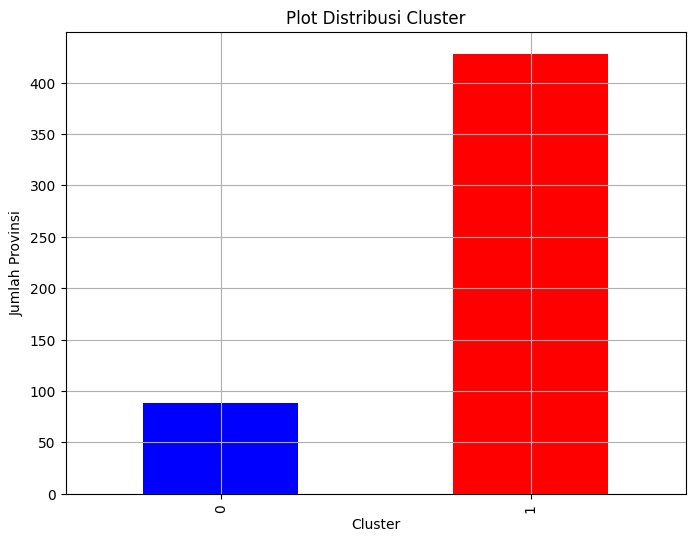

In [11]:
# Visualisasi distribusi tiap cluster
plt.figure(figsize=(8,6))
cluster_distribution.plot(kind='bar', color=['blue', 'red', 'orange'])
plt.title('Plot Distribusi Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Provinsi')
plt.grid(True)
plt.show()

In [12]:
#Menampilkan Rata-rata Setiap Cluster
cluster_means = df.groupby('Cluster').mean()
cluster_means

,2010 (Luas Panen),2010 (Produksi),2010 (Produktivitas),2011 (Luas Panen),2011 (Produksi),2011 (Produktivitas),2012 (Luas Panen),2012 (Produksi),2012 (Produktivitas),2013 (Luas Panen),...,2020 (Produktivitas),2021 (Luas Panen),2021 (Produksi),2021 (Produktivitas),2022 (Luas Panen),2022 (Produksi),2022 (Produktivitas),2023 (Luas Panen),2023 (Produksi),2023 (Produktivitas)
Cluster,,,,,,,,,,,,,,,,,,,,,
0,1.506467,1.747742,0.927817,1.485036,1.724477,0.833948,1.496634,1.731497,0.907256,1.520626,...,0.855227,1.684010,1.692767,0.825478,1.659841,1.677674,0.852668,1.668011,1.702597,0.851932
1,-0.309741,-0.359349,-0.190766,-0.305335,-0.354565,-0.171466,-0.307719,-0.356009,-0.186539,-0.312652,...,-0.175841,-0.346245,-0.348046,-0.169724,-0.341276,-0.344942,-0.175315,-0.342955,-0.350067,-0.175164


0 = Rendah <br> 1 = Tinggi

In [13]:
# 5. Menghitung Silhouette Score
from sklearn.metrics import silhouette_score 
features = df.drop(columns=['Cluster'])  # Mengambil fitur tanpa kolom 'Cluster'
silhouette_avg = silhouette_score(features, df['Cluster'])
print(f"Silhouette Score untuk K={optimal_k}: {silhouette_avg}")

Silhouette Score untuk K=2: 0.5108184666591401


Silhouette Score untuk K=2: 0.5108984545453625 <br> Silhouette Score untuk K=3: 0.3201311821063708 <br> Silhouette Score untuk K=4: 0.2918944724987728

In [14]:
# Import tambahan untuk Davies-Bouldin Index
from sklearn.metrics import davies_bouldin_score

# Menghitung Davies-Bouldin Index
dbi = davies_bouldin_score(features, df['Cluster'])
print(f"Davies-Bouldin Index untuk K={optimal_k}: {dbi}")

Davies-Bouldin Index untuk K=2: 0.890733648842861


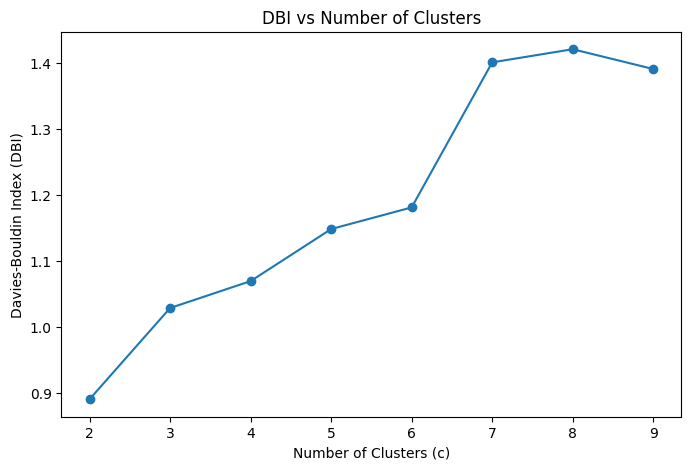

In [15]:
# Menghitung Davies-Bouldin Index untuk berbagai nilai K
dbi_values = []

for c in cluster_range:
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        scaled_data.T, c, 1.5, error=0.001, maxiter=5000, init=None
    )
    
    # Menentukan cluster untuk tiap provinsi berdasarkan keanggotaan tertinggi
    cluster_membership = np.argmax(u, axis=0)
    dbi = davies_bouldin_score(scaled_data, cluster_membership)
    dbi_values.append(dbi)

# Plot DBI untuk berbagai jumlah cluster
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, dbi_values, marker='o')
plt.xlabel("Number of Clusters (c)")
plt.ylabel("Davies-Bouldin Index (DBI)")
plt.title("DBI vs Number of Clusters")
plt.show()


C:\Users\YOSIA AMADEUS\AppData\Local\Temp\ipykernel_23144\1505300114.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_year['Cluster'] = df['Cluster']
C:\Users\YOSIA AMADEUS\AppData\Local\Temp\ipykernel_23144\1505300114.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_year['Cluster'] = df['Cluster']
C:\Users\YOSIA AMADEUS\AppData\Local\Temp\ipykernel_23144\1505300114.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

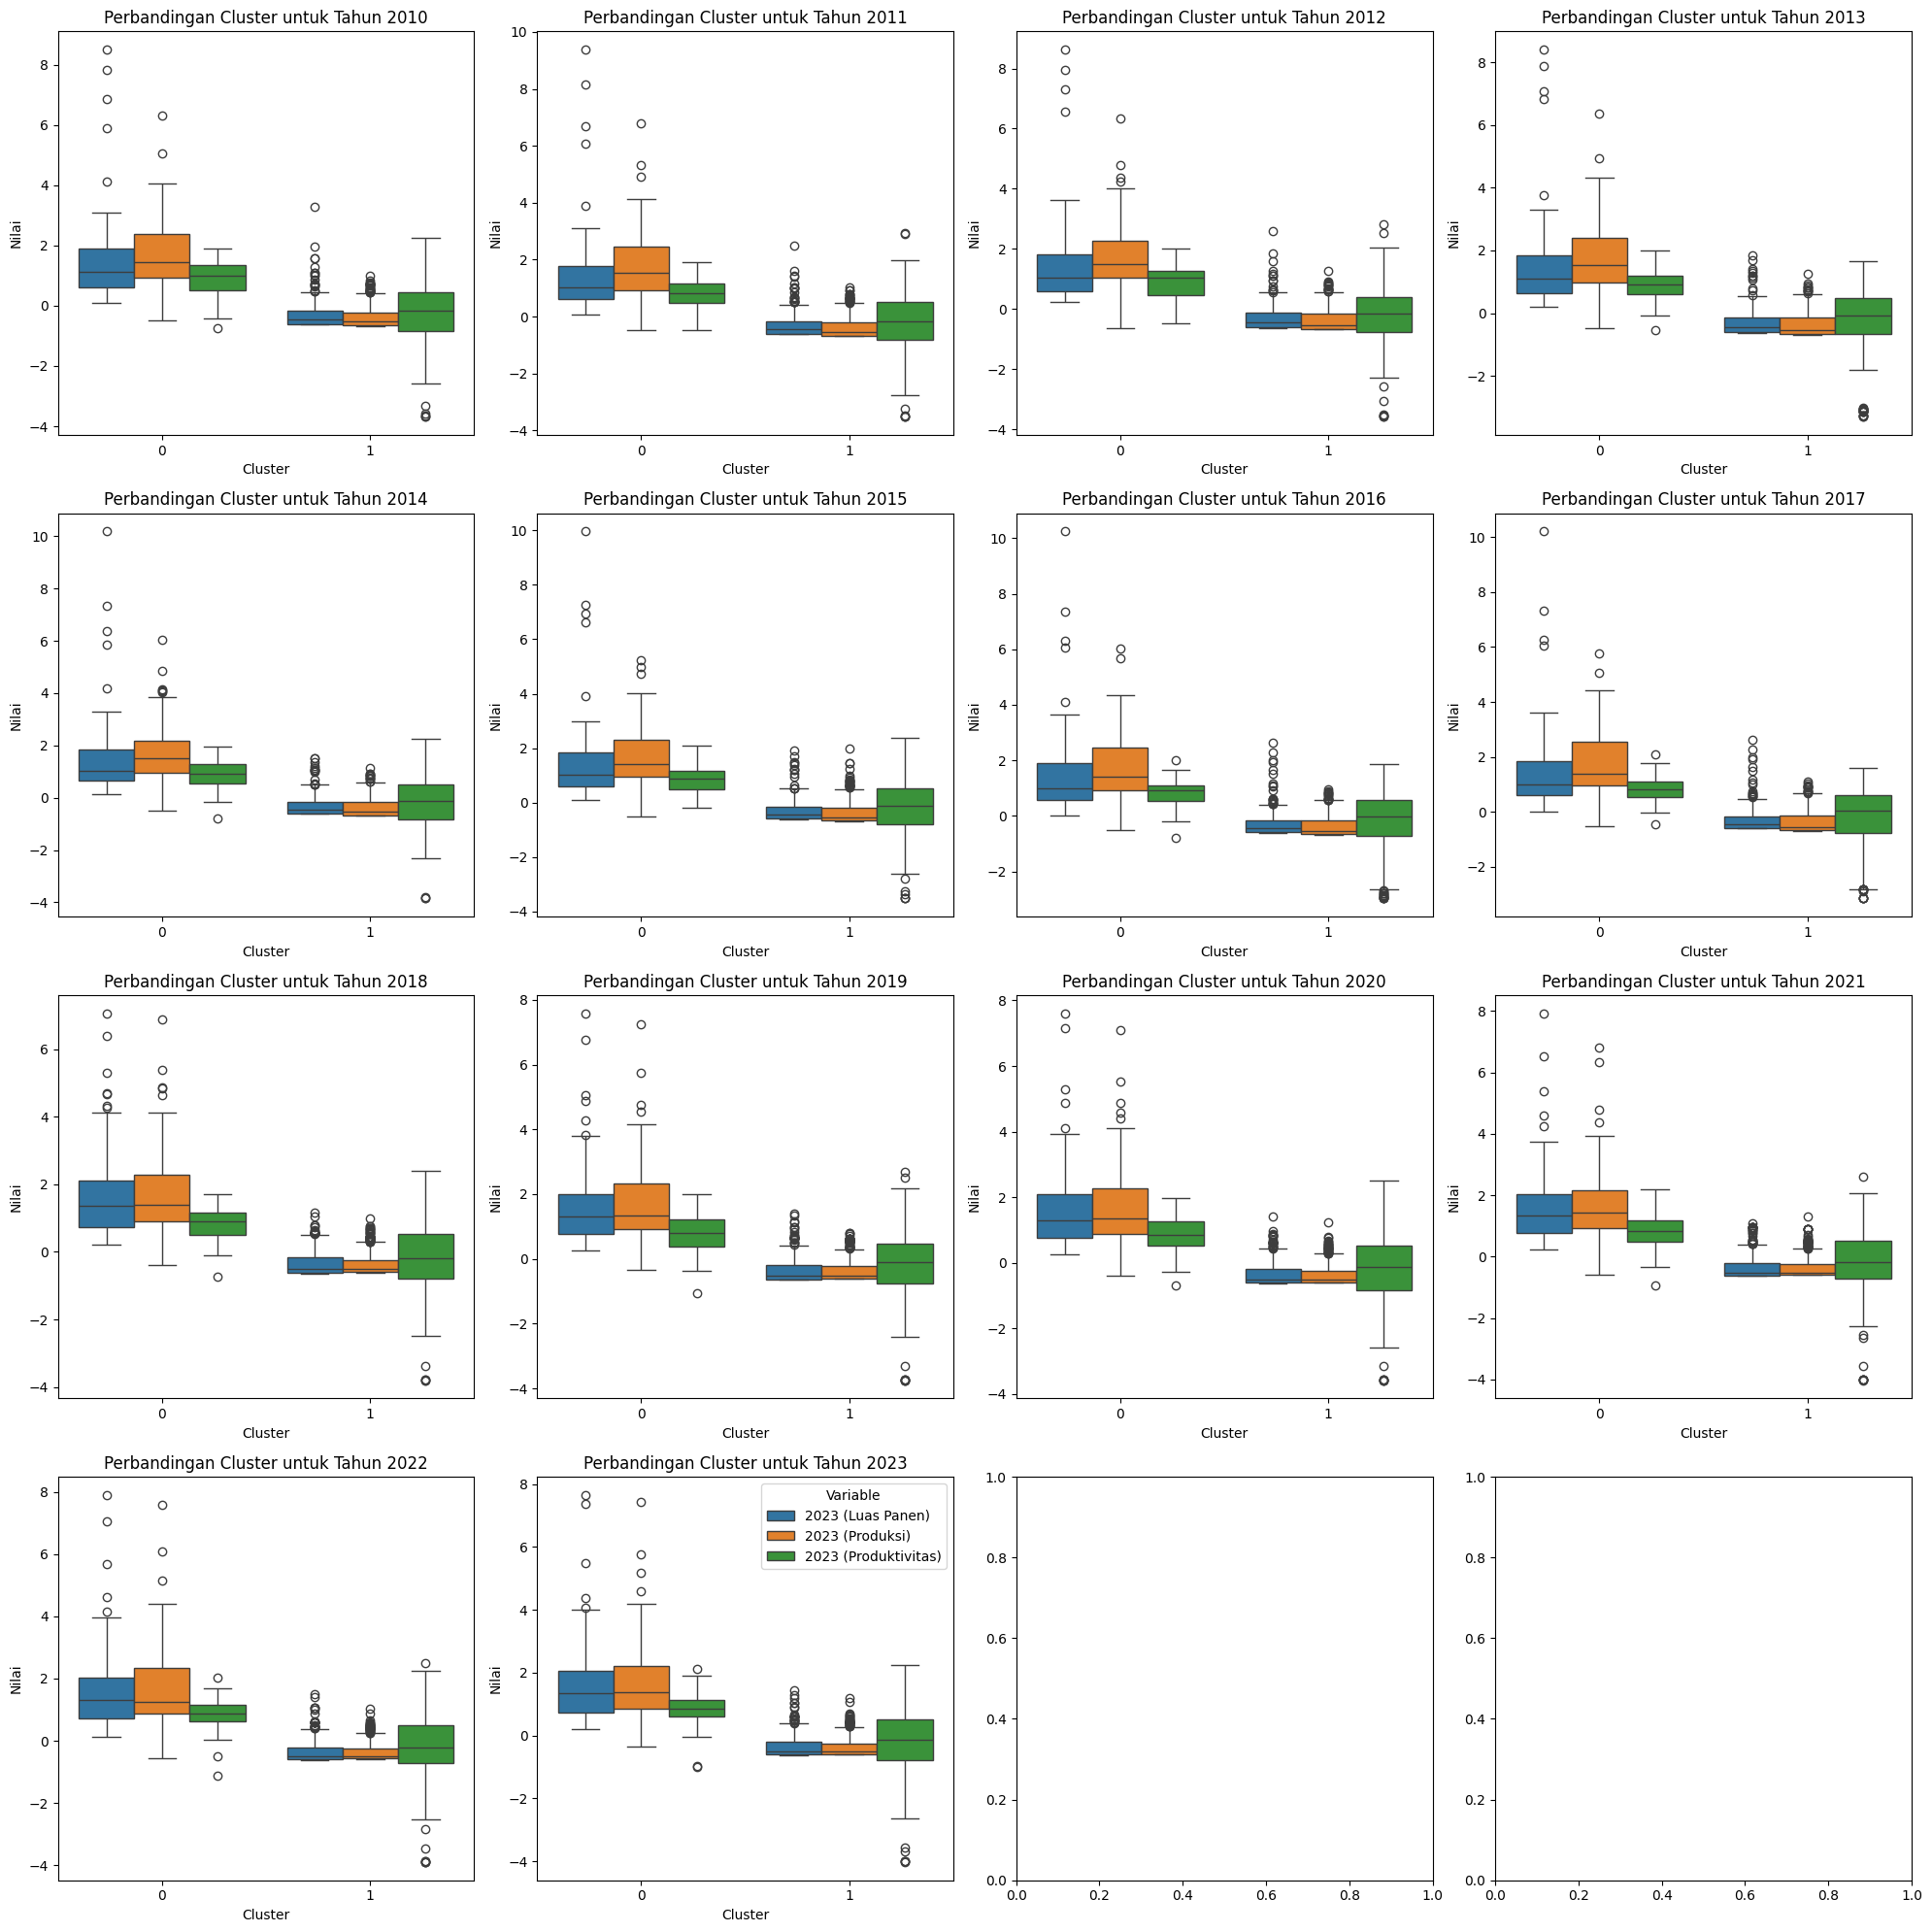

In [16]:
#Melakukan Subplot
import seaborn as sns
import matplotlib.pyplot as plt

# Daftar tahun yang ingin ditampilkan
years = list(range(2010, 2024))  # Tahun dari 2010 hingga 2023
num_years = len(years)

# Mengatur ukuran plot dan jumlah subplot
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))  # Sesuaikan jumlah baris dan kolom sesuai kebutuhan
axes = axes.flatten()

for i, year in enumerate(years):
    # Filter kolom untuk tahun tertentu
    data_year = df.filter(like=str(year), axis=1)
    data_year['Cluster'] = df['Cluster']
    
    # Reshape data untuk plotting
    data_year_melted = data_year.melt(id_vars='Cluster', var_name='Variable', value_name='Value')
    
    # Plot box plot pada subplot
    sns.boxplot(x='Cluster', y='Value', hue='Variable', data=data_year_melted, ax=axes[i])
    axes[i].set_title(f'Perbandingan Cluster untuk Tahun {year}')
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel('Nilai')

    # Menyembunyikan legend di setiap subplot, kecuali yang terakhir
    if i < num_years - 1:
        axes[i].get_legend().remove()

# Mengatur layout agar lebih rapi
plt.tight_layout()
plt.show()

In [17]:
# Import Library
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Memuat shapefile Indonesia
gdf = gpd.read_file("gadm41_IDN_2.shp")

print(gdf)

          GID_2 GID_0    COUNTRY     GID_1      NAME_1 NL_NAME_1   
0     IDN.1.2_1   IDN  Indonesia   IDN.1_1        Aceh        NA  \
1     IDN.1.1_1   IDN  Indonesia   IDN.1_1        Aceh        NA   
2     IDN.1.3_1   IDN  Indonesia   IDN.1_1        Aceh        NA   
3     IDN.1.4_1   IDN  Indonesia   IDN.1_1        Aceh        NA   
4     IDN.1.5_1   IDN  Indonesia   IDN.1_1        Aceh        NA   
..          ...   ...        ...       ...         ...       ...   
497  IDN.33.1_1   IDN  Indonesia  IDN.33_1  Yogyakarta        NA   
498  IDN.33.2_1   IDN  Indonesia  IDN.33_1  Yogyakarta        NA   
499  IDN.33.3_1   IDN  Indonesia  IDN.33_1  Yogyakarta        NA   
500  IDN.33.4_1   IDN  Indonesia  IDN.33_1  Yogyakarta        NA   
501  IDN.33.5_1   IDN  Indonesia  IDN.33_1  Yogyakarta        NA   

              NAME_2 VARNAME_2 NL_NAME_2     TYPE_2 ENGTYPE_2  CC_2    HASC_2   
0         Aceh Barat        NA        NA  Kabupaten   Regency  1107  ID.AC.AB  \
1    Aceh Barat Daya 

In [18]:
# Ekstrak nama provinsi dari gdf dan df
provinsi_gdf = set(gdf['NAME_2'].unique())
provinsi_df = set(df.index.unique())

# Cari nama provinsi yang ada di gdf tetapi tidak ada di df
provinsi_tidak_ada_di_df = provinsi_gdf - provinsi_df

# Tampilkan hasil
print("Kota di gdf yang tidak ada di df:")
print(provinsi_tidak_ada_di_df)


Kota di gdf yang tidak ada di df:
{'Waduk Cirata', 'Kota Pontianak', 'Danau', 'Waduk Kedungombo', 'Danau Limboto', 'Lake Toba'}


In [19]:
# Daftar fitur yang tidak mewakili kabupaten/kota
excluded_features = {"Waduk Kedungombo", "Danau", "Lake Toba", "Danau Limboto", "Ogan Komering Ulu", "Ogan Komering Ilir"}

# Filter gdf untuk menghilangkan fitur non-kabupaten/kota
gdf = gdf[~gdf['NAME_2'].isin(excluded_features)]

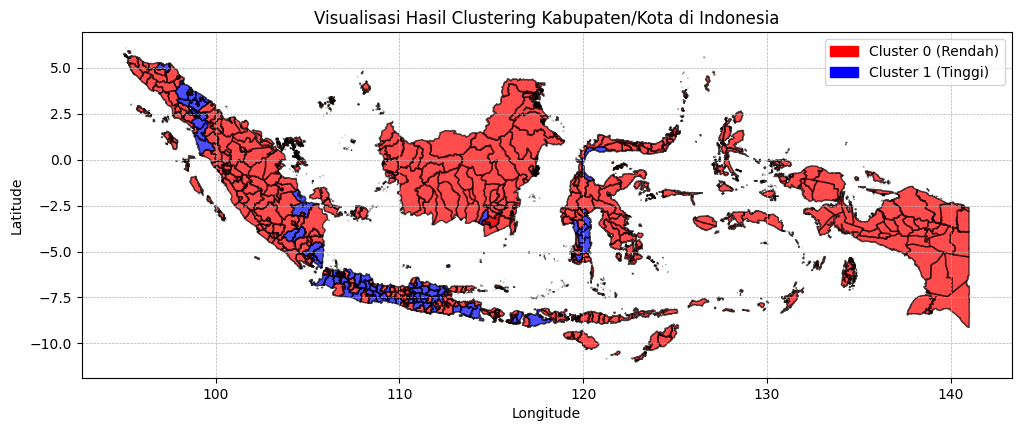

In [21]:
# Import Library
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Memuat shapefile Indonesia
gdf = gpd.read_file("gadm41_IDN_2.shp")

# Mengembalikan index ke kolom biasa
df_reset = df.reset_index()  # df adalah DataFrame asli Anda yang memiliki kolom 'Lokasi' sebagai index

# Kamus penyesuaian nama provinsi jika diperlukan
kamus_penyesuaian = {
    "Daerah Khusus Ibukota Jakarta": "Jakarta Raya",
    "Kepulauan Bangka Belitung": "Bangka Belitung",
    "Daerah Istimewa Yogyakarta": "Yogyakarta",
}

# Terapkan kamus untuk mengganti nama provinsi di df
df_reset['Lokasi'] = df_reset['Lokasi'].replace(kamus_penyesuaian)

# Ganti 'Lokasi' menjadi 'provinsi' untuk konsistensi
data_clustering = df_reset[['Lokasi', 'Cluster']].rename(columns={'Lokasi': 'provinsi'})

# Menggabungkan data ke level provinsi
gdf_provinsi = gdf.dissolve(by='NAME_2')  # Menggabungkan data kabupaten ke provinsi
gdf_provinsi = gdf_provinsi.merge(data_clustering, left_on='NAME_2', right_on='provinsi', how='left')

# Atur warna berdasarkan cluster
color_map = {0: 'blue', 1: 'red'}
gdf_provinsi['color'] = gdf_provinsi['Cluster'].map(color_map)
gdf_provinsi['color'] = gdf_provinsi['color'].fillna('lightgrey')  # Warna abu-abu untuk kabupaten/kota tanpa data

# Visualisasikan peta dengan warna cluster
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
gdf_provinsi.plot(ax=ax, color=gdf_provinsi['color'], alpha=0.7, edgecolor='black')

# Tambahkan grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Menambahkan legenda kustom
import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='red', label='Cluster 0 (Rendah)')
blue_patch = mpatches.Patch(color='blue', label='Cluster 1 (Tinggi)')
plt.legend(handles=[red_patch, blue_patch], loc='upper right')

# Tambahkan judul dan label
plt.title("Visualisasi Hasil Clustering Kabupaten/Kota di Indonesia")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()